In [17]:
import os
from dotenv import load_dotenv
from langchain_groq.chat_models import ChatGroq
from langchain_huggingface import HuggingFaceEmbeddings
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
from typing_extensions import  TypedDict
from typing import Annotated
from langchain_tavily import TavilySearch
from langgraph.prebuilt import ToolNode,tools_condition
from langgraph.checkpoint.memory import MemorySaver

load_dotenv()

True

In [3]:
llm = ChatGroq(model="qwen-qwq-32b")
llm.invoke("capital of india")

AIMessage(content="\n<think>\nOkay, the user is asking for the capital of India. Let me think, I remember that India's capital isn't Mumbai even though Mumbai is a major city. Wait, isn't it New Delhi? But sometimes people might confuse Delhi and New Delhi. Let me confirm.\n\nDelhi is the national capital territory, and within it is New Delhi, which is the actual capital. So the correct answer should be New Delhi. Let me check a reliable source or my existing knowledge. Yes, India's capital is New Delhi. I should also mention that it's the center of government and has historical significance. Maybe add a bit about when it became the capital. I think it was shifted from Kolkata (Calcutta) in 1911. That might be helpful context. Alright, I should phrase it clearly so there's no confusion between Delhi and New Delhi.\n</think>\n\nThe capital of India is **New Delhi**. It serves as the administrative and political center of the country and is part of the larger National Capital Territory (

In [7]:
class State(TypedDict):
     messages:Annotated[list,add_messages]

In [8]:
graph_builder = StateGraph(State)

In [21]:
def chatbot(state:State):
    return {"messages":llm.invoke(state["messages"])}

In [11]:
tool = TavilySearch(max_results=2)

In [12]:
tools = [tool]

In [13]:
llm_with_tools = llm.bind_tools(tools=tools)

In [15]:
tool_node = ToolNode(tools=tools)

In [22]:
graph_builder.add_node("chatbot",chatbot)

In [16]:
graph_builder.add_node("tools",tool_node)

In [23]:
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition
)

In [24]:
graph_builder.add_edge("tools","chatbot")
graph_builder.add_edge(START,"chatbot")

In [26]:
graph = graph_builder.compile()
# memory = MemorySaver()
# graph = graph_builder.compile(checkpointer=memory)

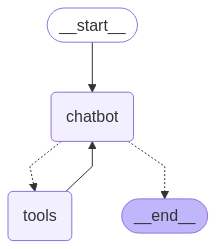

In [27]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [29]:
user_input = "I need some expert guidance for building an AI agent. Could you request assistance for me?"
config = {"configurable": {"thread_id": "1"}}

events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,
    stream_mode="values",
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

I need some expert guidance for building an AI agent. Could you request assistance for me?
================================== Ai Message ==================================


<think>
Okay, the user wants to build an AI agent and needs expert guidance. Let me start by understanding what exactly they're looking for. They mentioned needing some assistance, so maybe they're at the beginning stages or stuck somewhere.

First, I should break down the process into steps. Building an AI agent is a broad task, so structuring it into clear phases might help them get started. Maybe start with defining the problem and objectives. That's crucial because without knowing the goal, the rest can go off track.

Next, choosing the right AI framework or library. They might be confused between TensorFlow, PyTorch, or others. I should mention the most popular ones and their use cases. Also, considering if they need reinforcemen

In [33]:
output = graph.invoke({"messages": [{"role": "user", "content": "what is my name"}]}, config={"configurable": {"thread_id": "abc123"}})
output

{'messages': [HumanMessage(content='what is my name', additional_kwargs={}, response_metadata={}, id='fc1c456a-136c-40dc-93a7-80e9967db4b3'),
  AIMessage(content='\n<think>\nOkay, the user is asking, "what is my name." Let me think about how to approach this. First, I need to recall if the user has provided their name in previous interactions. Since I don\'t have memory of past conversations, I can\'t refer back. The user might be testing if I can remember their name from earlier, but I can\'t do that.\n\nAlternatively, maybe they\'re asking in a general sense, like how to refer to themselves. Or perhaps they\'re confused about their own name and need help figuring it out. Since I can\'t access personal data or previous chats, the best response is to politely explain that I can\'t know their name unless they tell me. I should offer to help them with whatever they need, even if it\'s just a friendly interaction. Let me make sure to phrase it clearly and offer assistance without assuming

In [34]:
llm.invoke("my name is manoj",config={"configurable":{"thread_id":"123"}})

AIMessage(content='\n<think>\nOkay, the user said "my name is manoj". I should respond politely. Let me start by greeting them and acknowledging their name. Maybe say something like "Hello Manoj, it\'s nice to meet you!" That sounds friendly. I should also ask how I can assist them today. Keep it open-ended so they feel comfortable to ask anything. Let me check for any typos or errors. All good. Alright, ready to send the response.\n</think>\n\nHello Manoj, it\'s nice to meet you! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 113, 'prompt_tokens': 15, 'total_tokens': 128, 'completion_time': 0.276986838, 'prompt_time': 0.003375355, 'queue_time': 0.5495269890000001, 'total_time': 0.280362193}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'stop', 'logprobs': None}, id='run-7cadd349-aa53-420b-aab1-bdd797d4c1c9-0', usage_metadata={'input_tokens': 15, 'output_tokens': 113, 'total_tokens': 1

In [35]:
llm.invoke("what is my name",config={"configurable":{"thread_id":"123"}})

AIMessage(content='\n<think>\nOkay, the user is asking "what is my name." First, I need to figure out how to respond appropriately. Since I don\'t have access to any personal data or previous interactions, I can\'t know the user\'s name. My programming restricts me from storing or retrieving personal information.\n\nI should make sure to state clearly that I can\'t access personal details. It\'s important to be honest and straightforward. Maybe the user is testing the system or forgot they haven\'t provided their name yet. I should also offer assistance with whatever they need help with, to be helpful.\n\nWait, maybe I should check if there was any context from earlier, but since each interaction is independent, I can\'t refer to prior conversations. The user might be expecting me to remember, so I need to clarify that each session is separate.\n\nI need to phrase the response politely, letting them know I can\'t retrieve their name but am here to help with other questions or tasks. Le